In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('data/data.csv')

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,21.76,21.879999,21.379999,21.490000,12.106178,23912400
1,2013-01-03,21.25,21.510000,21.080000,21.250000,11.970979,18302200
2,2013-01-04,20.91,21.110001,20.650000,21.070000,11.869576,18256800
3,2013-01-07,20.93,20.969999,20.490000,20.680000,11.649875,15003800
4,2013-01-08,20.52,20.580000,20.309999,20.370001,11.475241,12462900


In [4]:
data['Price'] = data['Adj Close']

In [5]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Price
0,2013-01-02,21.76,21.879999,21.379999,21.490000,12.106178,23912400,12.106178
1,2013-01-03,21.25,21.510000,21.080000,21.250000,11.970979,18302200,11.970979
2,2013-01-04,20.91,21.110001,20.650000,21.070000,11.869576,18256800,11.869576
3,2013-01-07,20.93,20.969999,20.490000,20.680000,11.649875,15003800,11.649875
4,2013-01-08,20.52,20.580000,20.309999,20.370001,11.475241,12462900,11.475241
...,...,...,...,...,...,...,...,...
2680,2023-08-25,12.77,12.830000,12.650000,12.740000,12.740000,13184800,12.740000
2681,2023-08-28,12.81,12.950000,12.760000,12.920000,12.920000,9681400,12.920000
2682,2023-08-29,12.99,13.380000,12.930000,13.330000,13.330000,21719400,13.330000
2683,2023-08-30,13.43,13.460000,13.250000,13.330000,13.330000,10979000,13.330000


In [6]:
# retorno diário
data['Return'] = data['Price'].pct_change()

short_window = 10
long_window = 50

data['Short_MA'] = data['Price'].rolling(window=short_window).mean()
data['Long_MA'] = data['Price'].rolling(window=long_window).mean()

data['Signal'] = 0
data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1

# retornos da estratégia
data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']

# retorno acumulado
data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

data

            Date   Open       High        Low      Close  Adj Close    Volume  \
0     2013-01-02  21.76  21.879999  21.379999  21.490000  12.106178  23912400   
1     2013-01-03  21.25  21.510000  21.080000  21.250000  11.970979  18302200   
2     2013-01-04  20.91  21.110001  20.650000  21.070000  11.869576  18256800   
3     2013-01-07  20.93  20.969999  20.490000  20.680000  11.649875  15003800   
4     2013-01-08  20.52  20.580000  20.309999  20.370001  11.475241  12462900   
...          ...    ...        ...        ...        ...        ...       ...   
2680  2023-08-25  12.77  12.830000  12.650000  12.740000  12.740000  13184800   
2681  2023-08-28  12.81  12.950000  12.760000  12.920000  12.920000   9681400   
2682  2023-08-29  12.99  13.380000  12.930000  13.330000  13.330000  21719400   
2683  2023-08-30  13.43  13.460000  13.250000  13.330000  13.330000  10979000   
2684  2023-08-31  13.36  13.420000  13.150000  13.170000  13.170000  15771800   

          Price    Return  

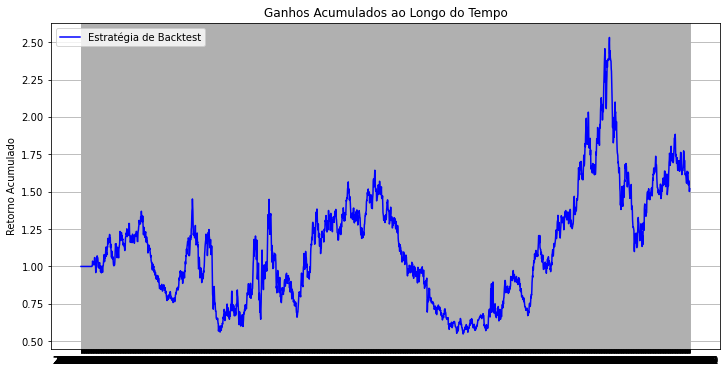

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Cumulative_Return'], label='Estratégia de Backtest', color='blue')
#plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.title('Ganhos Acumulados ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()

In [15]:
def backtest(data, short_window, long_window):
    
    data['Return'] = data['Price'].pct_change()

    data['Short_MA'] = data['Price'].rolling(window=short_window).mean()
    data['Long_MA'] = data['Price'].rolling(window=long_window).mean()

    data['Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'Signal'] = 1
    data.loc[data['Short_MA'] < data['Long_MA'], 'Signal'] = -1

    data['Strategy_Return'] = data['Signal'].shift(1) * data['Return']

    data['Cumulative_Return'] = (1 + data['Strategy_Return']).cumprod()

    return data['Cumulative_Return'].iloc[-1]

In [16]:
short_window_values = [7, 9, 10, 20, 21, 50, 66]
long_window_values = [21, 40, 50, 100, 200]

results = []

for short_window in short_window_values:
    for long_window in long_window_values:
        final_return = backtest(data.copy(), short_window, long_window)
        results.append((short_window, long_window, final_return))

results.sort(key=lambda x: x[2], reverse=True)

for result in results:
    print(f"Short MA: {result[0]}, Long MA: {result[1]}, Return: {result[2]}")

Short MA: 20, Long MA: 50, Return: 2.769245438707373
Short MA: 20, Long MA: 40, Return: 2.6083197883633393
Short MA: 21, Long MA: 50, Return: 2.1262386790457155
Short MA: 9, Long MA: 50, Return: 1.8770862253844105
Short MA: 21, Long MA: 40, Return: 1.826778754381386
Short MA: 10, Long MA: 50, Return: 1.5194101390168289
Short MA: 7, Long MA: 21, Return: 1.4996381299956765
Short MA: 9, Long MA: 21, Return: 1.4436957714873642
Short MA: 9, Long MA: 40, Return: 1.3776584915665107
Short MA: 7, Long MA: 40, Return: 1.348390419685878
Short MA: 7, Long MA: 50, Return: 1.2990845225951348
Short MA: 21, Long MA: 100, Return: 1.2137135594077328
Short MA: 10, Long MA: 40, Return: 1.1957776221624334
Short MA: 20, Long MA: 100, Return: 1.0815413762552708
Short MA: 9, Long MA: 200, Return: 1.0509118176717316
Short MA: 10, Long MA: 21, Return: 1.0251233591169662
Short MA: 21, Long MA: 21, Return: 1.0
Short MA: 50, Long MA: 50, Return: 1.0
Short MA: 20, Long MA: 21, Return: 0.8658479387484161
Short MA: 1

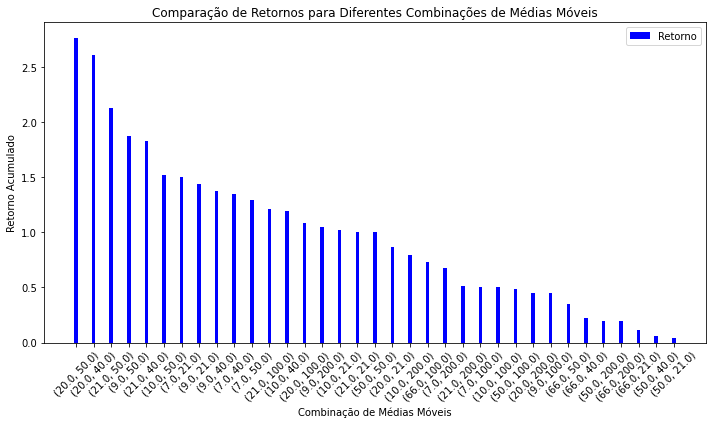

In [18]:
results_df = pd.DataFrame(results, columns=['Short_MA', 'Long_MA', 'Return'])

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(results_df))

plt.bar(index, results_df['Return'], bar_width, label='Retorno', color='b')
plt.xlabel('Combinação de Médias Móveis')
plt.ylabel('Retorno Acumulado')
plt.title('Comparação de Retornos para Diferentes Combinações de Médias Móveis')
plt.xticks(index, [f"({row['Short_MA']}, {row['Long_MA']})" for index, row in results_df.iterrows()], rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for index, row in results_df.iterrows():
    short_window = row['Short_MA']
    long_window = row['Long_MA']
    strategy_data = backtest(data.copy(), short_window, long_window)
    plt.plot(data['Date'], strategy_data['Cumulative_Return'], label=f'Short_MA={short_window}, Long_MA={long_window}')

plt.xlabel('Data')
plt.ylabel('Retorno Acumulado')
plt.title('Comparação do Desempenho de Diferentes Combinações de Médias Móveis ao Longo do Tempo')
plt.legend()
plt.grid(True)

plt.show()

In [19]:
results_df

,Short_MA,Long_MA,Return
0,20,50,2.769245
1,20,40,2.608320
2,21,50,2.126239
3,9,50,1.877086
4,21,40,1.826779
5,10,50,1.519410
6,7,21,1.499638
7,9,21,1.443696
8,9,40,1.377658
9,7,40,1.348390
